- 매장 (식당)관리자
- 요즘 음식 재고로 인해서 골치를 썩고 있음...
- 매번 식수를 감으로 예측하지만, 어떤 날에는 적게, 어떤 날에는 많게 식당을 이용하는 상황이 허다하여, **재고관리측면**에서 손실을 보고 있음

> 메뉴 정보와 근무자의 정보 data를 활용하여, 식수르 예측하거나 재고를 효율적으로 관리하려고 함

```
# 워드클라우드를 위한 한글 폰트 설치
!apt-get install -y fonts-nanum*
!fc-cache -fv
!rm -rf ~/.cache/matplotlib
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/인사교

/content/drive/MyDrive/인사교


In [ ]:
!pwd

/content/drive/MyDrive/인사교


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/Cafeteria.csv')
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month,조식메뉴_Main,중식메뉴_Main,석식메뉴_Main
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 된장찌개 쥐어채무침 포기김치,쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치,쌀밥/잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치,1039.0,331.0,2,쥐어채무침,오징어찌개,건파래무침
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 호박젓국찌개 시래기조림 포...,쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이,콩나물밥*양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치,867.0,560.0,2,단호박샌드,김치찌개,콩나물밥
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 콩나물국 느타리호박볶음 ...,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치,쌀밥/잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치,1017.0,573.0,2,느타리호박볶음,견과류조림,새송이버섯볶음
3,2016-02-04,목,2601,104,220,355,0.0,모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 근대국 멸치볶음 포기김치,쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치,미니김밥*겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치,978.0,525.0,2,근대국,부추전,미니김밥
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 재첩국 방풍나물 포기김치,쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치,쌀밥/잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치,925.0,330.0,2,방풍나물,돈육씨앗강정,감자소세지볶음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,마늘종숙회,견과류마카로니범벅,맛살튀김
1158,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,생크림단팥빵,버섯숙회,비엔나채소볶음
1159,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,바지락살국,계란파국,수제맛쵸킹탕수육
1160,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,분홍소세지구이,양념김,생강채


### 모델링을 위한 데이터 준비
- 데이터 스케일링
  - 거리기반, linear 기반 모델들은 특성(X)의 값 자체에 영향을 많이 받음(영향을 받지않는 모델은 DT기반)
  - 모든 Feature가 동일한 스케일을 가지도록 값을 재조정
  - 장점 : 모델의 성능 향상
  - 단점 : 원래의 값을 잃어버림 -> 스케일링 이후의 값은 해석하기가 어려움
- 인코딩 -> 범주형 데이터들

In [ ]:
# 불필요한 컬럼 삭제
df.drop(columns= ['일자', '조식메뉴', '중식메뉴', '석식메뉴'], inplace=True)
# 일자 -> month로 대체
# 메뉴 -> Main메뉴를 활용할 예정

In [ ]:
# 데이터 타입에 나누기
df['석식메뉴_Main'].dtype == 'O'

True

In [ ]:
# 수치형, 범주형 컬럼(인덱스 재료) 나눶주기
numeric_list = [] # 수치형 컬럼
categorical_list = [] # 범주형 컬럼

for column in df.columns:
  if df[column].dtype == 'O':
    categorical_list.append(column)
  else:
    numeric_list.append(column)

In [ ]:
numeric_list, categorical_list

(['본사정원수',
  '본사휴가자수',
  '본사출장자수',
  '본사시간외근무명령서승인건수',
  '현본사소속재택근무자수',
  '중식계',
  '석식계',
  'month'],
 ['요일', '조식메뉴_Main', '중식메뉴_Main', '석식메뉴_Main'])

#### 스케일링 선택, 적용을 위한 데이터 분포 확인
1. StandardScaler : 데이터들을 평균이 0, 표준편차가 1이 되도록 변경
  - 데이터가 정규분포를 따르는 경우 유용 <br><br>
2. MinMaxScaler : 데이터들을 고정된 범위(보통은 0 ~ 1)로 변환
  - 데이터가 비정규 분포를 따르는 경우 유용

In [ ]:
# 차트 스타일을 어둡게 설정
plt.style.use('dark_background') # 보통 더 잘보임

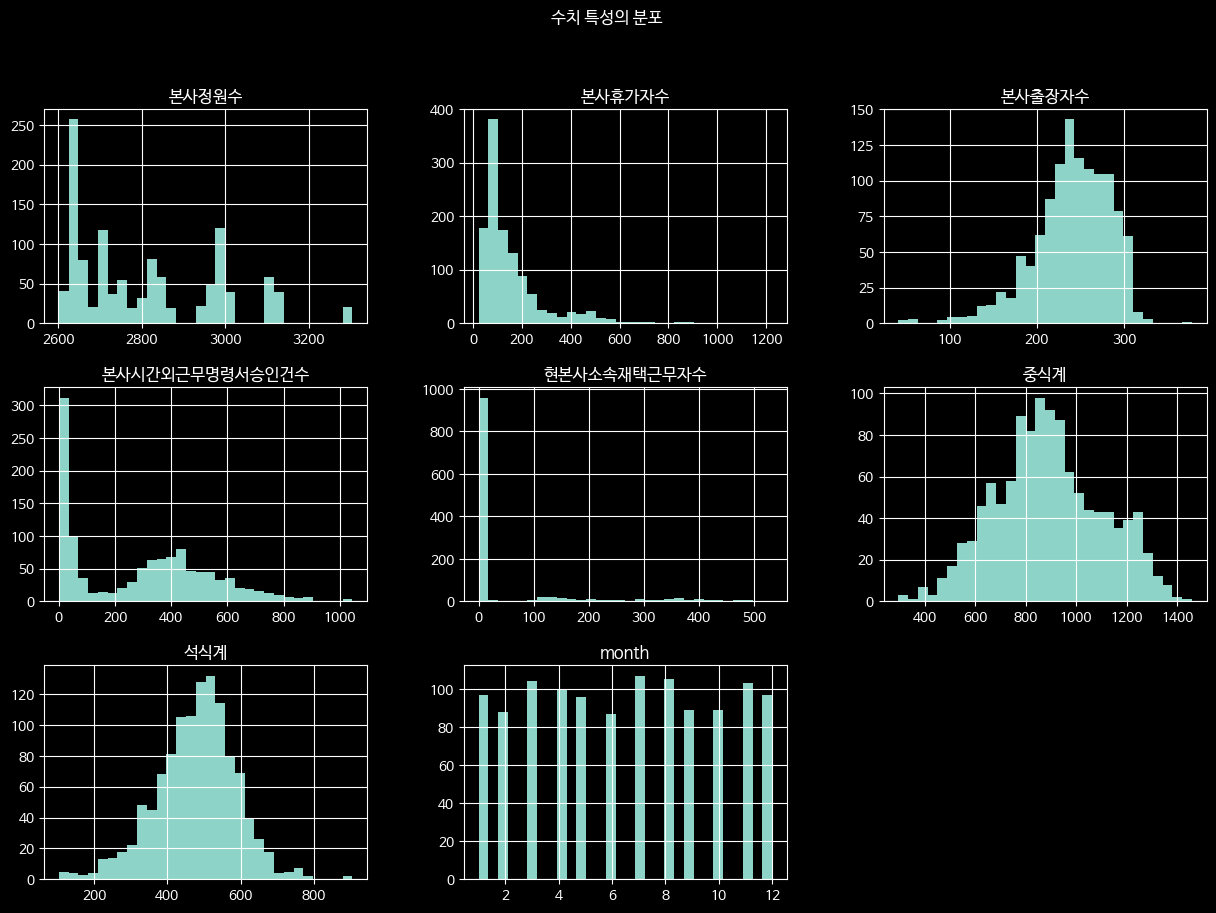

In [ ]:
# 분포 확인(히스토그램 그려보기)
df[numeric_list].hist(
    bins = 30, # 히스토그램 막대 개수
    figsize = (15, 10),
)
plt.suptitle('수치 특성의 분포')
plt.show()
# 정규분포(값이 평균을 중심으로 고르게 분포되어 있음) : 중식계, 석식계
# 정규분포에 가까움 : 분사출장자수
# 그 외 컬럼 : 비정규 분포(특정 구간에 값이 집중되는 경향이 있거나, 일부 높은 피크들이 다수 존재함)
# (month는 균등 분포 -> 군등하게 분포되어 있음)

##### 스케일링 방법 선택
- 모든 Feature가 동일한 스케일을 가지도록 **하나의 스케일링 방법**으로 일관되게 처리하는 것이 중요
- 대부분의 Feature들이 정규 분포를 따르지 않아서, MinMaxScaler 선택!

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 스케일러 초기화(생성)
scaler = MinMaxScaler()

In [ ]:
# df2 = df # 얕은 복사 -> 주소값을 공유 -> 복사본(df2)를 바꾸면 원본(df)도 데이터가 바뀜
df_scaled = df.copy() # 강한 복사(깊은 복사) -> 주소값을 따로따로 생성(진짜 복사본을 생성)
df_scaled[numeric_list] = scaler.fit_transform(df_scaled[numeric_list])

In [ ]:
scaler.fit(df_scaled[numeric_list])

MinMaxScaler()

#### 수치데이터 상관관계 분석

In [ ]:
import seaborn as sns

<Axes: >

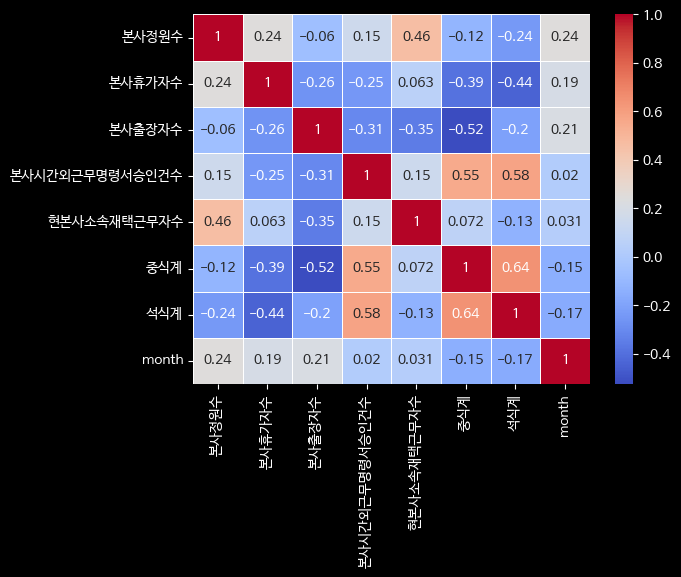

In [ ]:
corr_matrix = df_scaled[numeric_list].corr()
sns.heatmap(
    corr_matrix,
    annot = True, # 각 셀에 상관계수 값을 표시
    cmap = 'coolwarm', # 색상 맵
    linewidths = 0.5, # 셀끼리의 경계선
)